# Exercise 1.2 - Oja’s Rule Neural Network

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Load and transform dataset

In [3]:
df = pd.read_csv("/Users/monahelness/72.27-SIA-8/TP4/exercise1/data/europe.csv")
X = df.drop("Country", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



### Oja's Rule

Oja's learning rule updates the weight vector `w` of a single neuron based on:

\[
\Delta w = \eta \cdot y \cdot (x - y \cdot w)
\]

Where:
- `x` is the input vector (one sample)
- `w` is the weight vector
- `y = w^T x` is the output
- `η` is the learning rate

Over time, `w` will align with the direction of highest variance → the **first principal component**.


In [4]:

def train_oja(X, learning_rate=0.01, n_epochs=100):
    np.random.seed(0)
    w = np.random.rand(X.shape[1])
    
    for epoch in range(n_epochs):
        for x in X:
            y = np.dot(w, x)
            w += learning_rate * y * (x - y * w)
    
    # Normalize weight vector
    w /= np.linalg.norm(w)
    return w

oja_vector = train_oja(X_scaled)
print("Oja vector (approx. 1st PC):", oja_vector)


Oja vector (approx. 1st PC): [-0.19866245  0.48004887 -0.46978966  0.49084563 -0.12810806  0.44762408
 -0.2273226 ]


### PCA comparison

In [5]:
pca = PCA(n_components=1)
pca.fit(X_scaled)
pca_vector = pca.components_[0]
print("PCA 1st component:", pca_vector)

# Cosine similarity (should be close to 1 or -1)
cos_sim = np.dot(oja_vector, pca_vector)
print("Cosine similarity:", cos_sim)


PCA 1st component: [ 0.1248739  -0.50050586  0.40651815 -0.48287333  0.18811162 -0.47570355
  0.27165582]
Cosine similarity: -0.9918578012248209


### Vector comparison

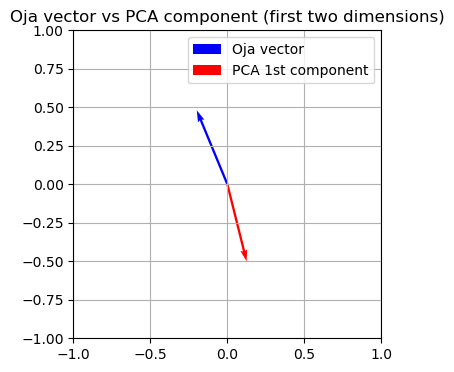

In [10]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)

# Plot Oja vector
ax.quiver(0, 0, oja_vector[0], oja_vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Oja vector')

# Plot PCA vector
ax.quiver(0, 0, pca_vector[0], pca_vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='PCA 1st component')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.legend()
plt.grid()
plt.title("Oja vector vs PCA component (first two dimensions)")
plt.show()


## Interpretation

- The vector learned using **Oja’s rule** closely approximates the **first principal component** from PCA.
- The **cosine similarity ≈ −0.99** indicates that the vectors lie on the **same line**, but point in **opposite directions**.
- This is completely normal: in PCA, principal components are **directional** and are defined **up to a sign** (i.e. multiplying by −1 still represents the same component).
- In other words, both vectors describe the same dominant axis of variation in the data — the sign only affects orientation, not meaning.
- This confirms that Oja’s rule is capable of learning the **main direction of variance** in an unsupervised manner, using only local updates and no eigenvalue decomposition.

